# Testing Models, Plots and Much More
In this chapter, You will pick up advanced unit testing skills like setup, teardown and mocking. You will also learn how to write sanity tests for your data science models and how to test matplotlib plots. By the end of this chapter, you will be ready to test real world data science projects!

## Use a fixture for a clean data file
In the video, you saw how the preprocess() function creates a clean data file.

The get_data_as_numpy_array() function takes the path to this clean data file as the first argument and the number of columns of data as the second argument. It returns a NumPy array holding the data.

In a previous exercise, you wrote the test test_on_clean_file() without using a fixture. That's bad practice! This time, you'll use the fixture clean_data_file(), which

- creates a clean data file in the setup,
- yields the path to the clean data file,
- removes the clean data file in the teardown.

The contents of the clean data file that you will use for testing is printed in the IPython console.

pytest, os, numpy as np and get_data_as_numpy_array() have been imported for you.


- Add the correct decorator that would turn clean_data_file() into a fixture.
- Pass an argument to the test test_on_clean_file() so that it uses the fixture.
- Pass the clean data file path yielded by the fixture as the first argument to the function get_data_as_numpy_array().

In [1]:
import pytest
import numpy as np

# Add a decorator to make this function a fixture
@pytest.fixture
def clean_data_file():
    file_path = "clean_data_file.txt"
    with open(file_path, "w") as f:
        f.write("201\t305671\n7892\t298140\n501\t738293\n")
    yield file_path
    os.remove(file_path)
    
# Pass the correct argument so that the test can use the fixture
def test_on_clean_file(clean_data_file):
    expected = np.array([[201.0, 305671.0], [7892.0, 298140.0], [501.0, 738293.0]])
    # Pass the clean data file path yielded by the fixture as the first argument
    actual = get_data_as_numpy_array(clean_data_file, 2)
    assert actual == pytest.approx(expected), "Expected: {0}, Actual: {1}".format(expected, actual) 

Good work! pytest keeps the fixtures separate from the tests as this encourages reusing fixtures for tests that need the same/similar setup and teardown code.

## Write a fixture for an empty data file
When a function takes a data file as an argument, you need to write a fixture that takes care of creating and deleting that data file. This exercise will test your ability to write such a fixture.

get_data_as_numpy_array() should return an empty numpy array if it gets an empty data file as an argument. To test this behavior, you need to write a fixture empty_file() that does the following.

Creates an empty data file empty.txt relative to the current working directory in setup.
Yields the path to the empty data file.
Deletes the empty data file in teardown.
The fixture will be used by the test test_on_empty_file(), which is available for you to see in the script.

os, pytest, numpy as np and get_data_as_numpy_array have been imported for you.

## Instructions

- In the setup, assign the variable file_path to the correct string.
- After the setup, yield the variable file_path so that the test can use it.
- In the teardown, remove the file.

In [2]:
import os

@pytest.fixture
def empty_file():
    # Assign the file path "empty.txt" to the variable
    file_path = "empty.txt"
    open(file_path, "w").close()
    # Yield the variable file_path
    yield file_path
    # Remove the file in the teardown
    os.remove(file_path)
    
def test_on_empty_file(self, empty_file):
    expected = np.empty((0, 2))
    actual = get_data_as_numpy_array(empty_file, 2)
    assert actual == pytest.approx(expected), "Expected: {0}, Actual: {1}".format(expected, actual)

## Question
The test test_on_empty_file() was added to the test class TestGetDataAsNumpyArray, which lives in the test module tests/features/test_as_numpy.py. The fixture empty_file() was also written to this test module.

Remembering that the current working directory in the IPython console is tests, run the test test_on_empty_file(). What is the outcome?

In [3]:
!pytest utils/test_as_numpy_ch4.py

============================= test session starts ==============================
platform darwin -- Python 3.9.1, pytest-5.2.2, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.1.1
Freetype: 2.10.2
rootdir: /Users/alejandro.robles/PycharmProjects/unit-testing-for-data-science-in-python
plugins: mock-1.11.2, mpl-0.10
collected 2 items                                                              

utils/test_as_numpy_ch4.py ..                                            [100%]

============================== 2 passed in 0.16s ===============================


The test passes. Notice that fixtures like empty_file() are quite reusable, since any function which accepts data files as arguments needs to be tested with an empty file.

## Fixture chaining using tmpdir
The built-in tmpdir fixture is very useful when dealing with files in setup and teardown. tmpdir combines seamlessly with user defined fixture via fixture chaining.

In this exercise, you will use the power of tmpdir to redefine and improve the empty_file() fixture that you wrote in the last exercise and get some experience with fixture chaining.

### Instructions
- Add the correct argument to the fixture empty_file() so that it chains with the built-in fixture tmpdir.
- Use the appropriate method to create an empty file "empty.txt" inside the temporary directory created by tmpdir.

In [4]:
import pytest

@pytest.fixture
# Add the correct argument so that this fixture can chain with the tmpdir fixture
def empty_file(tmpdir):
    # Use the appropriate method to create an empty file in the temporary directory
    file_path = tmpdir.join("empty.txt")
    open(file_path, "w").close()
    yield file_path

## Question
In what order will the setup and teardown of empty_file() and tmpdir be executed?

1. setup of tmpdir 
2. setup of empty_file()  
3. teardown of empty_file()  
4. teardown of tmpdir.

Well ordered! Notice how you didn't have to write any teardown code to delete the empty file, because tmpdir is going to take care of that for us in its teardown step, which is executed last.

## Program a bug-free dependency
In the video, row_to_list() was mocked. But preprocess() has another dependency convert_to_int(). Generally, its best to mock all dependencies of the function under test. It's your job to mock convert_to_int() in this and the following exercises.

The raw data file used in the test is printed in the IPython console. The second row "1,767565,112\n" is dirty, so row_to_list() will filter it out. The rest will be converted to lists and convert_to_int() will process the areas and prices.

The mocked convert_to_int() should process these areas and prices correctly. Here is the dictionary holding the correct return values.

<code>
{"1,801": 1801, "201,411": 201411, "2,002": 2002, "333,209": 333209, "1990": None, "782,911": 782911, "1,285": 1285, "389129": None}
</code>

### Instructions
- Define a function convert_to_int_bug_free() which takes one argument called comma_separated_integer_string.
- Assign return_values to the dictionary holding the correct return values in the context of the raw data file used in the test.
- Return the correct return value by looking up the dictionary return_values for the key comma_separated_integer_string.

In [5]:
# Define a function convert_to_int_bug_free
def convert_to_int_bug_free(comma_separated_integer_string):
    # Assign to the dictionary holding the correct return values 
    return_values = {"1,801": 1801, "201,411": 201411, "2,002": 2002, "333,209": 333209, "1990": None, "782,911": 782911, "1,285": 1285, "389129": None}
    # Return the correct result using the dictionary return_values
    return return_values[comma_separated_integer_string]

Note that the bug-free version of the dependency is usually much simpler that the dependency itself, since it just needs to be bug-free for the arguments that it receives within the test. It does not need to bug-free in the general case i.e. for any argument imaginable.

## Mock a dependency
Mocking helps us replace a dependency with a MagicMock() object. Usually, the MagicMock() is programmed to be a bug-free version of the dependency. To verify whether the function under test works properly with the dependency, you simply check whether the MagicMock() is called with the correct arguments and in the right order.

In the last exercise, you programmed a bug-free version of the dependency data.preprocessing_helpers.convert_to_int in the context of the test test_on_raw_data(), which applies preprocess() on a raw data file. The data file is printed out in the IPython console.

pytest, unittest.mock.call, preprocess raw_and_clean_data_file and convert_to_int_bug_free has been imported for you.

### Instructions 
- In the test test_on_raw_data(), add the correct argument that enables the use of the mocking fixture.
- Replace the dependency "data.preprocessing_helpers.convert_to_int" with the bug-free version convert_to_int_bug_free() by using the correct method and side effect.
- Use the correct attribute which returns the list of calls to the mock, and check if the mock was called with this sequence of arguments: "1,801", "201,411", "2,002", "333,209", "1990", "782,911", "1,285", "389129".


In [6]:
from unittest.mock import call
from utils.preprocessing_helpers import preprocess
from utils.test_preprocessing_helpers import convert_to_int_bug_free, raw_and_clean_data_file


# Add the correct argument to use the mocking fixture in this test
def test_on_raw_data(self, raw_and_clean_data_file, mocker):
    raw_path, clean_path = raw_and_clean_data_file
    # Replace the dependency with the bug-free mock
    convert_to_int_mock = mocker.patch("data.preprocessing_helpers.convert_to_int",
                                       side_effect=convert_to_int_bug_free)
    preprocess(raw_path, clean_path)
    # Check if preprocess() called the dependency correctly
    assert convert_to_int_mock.call_args_list == [call("1,801"), call("201,411"), call("2,002"), call("333,209"), call("1990"), call("782,911"), call("1,285"), call("389129")]
    with open(clean_path, "r") as f:
        lines = f.readlines()
    first_line = lines[0]
    assert first_line == "1801\\t201411\\n"
    second_line = lines[1]
    assert second_line == "2002\\t333209\\n" 
    


## Question
The test that you wrote was written to the test class TestPreprocess in the test module data/test_preprocessing_helpers.py. The same test module also contains the test class TestConvertToInt.

Run the tests in TestPreprocess and TestConvertToInt. Based on the test result report, which of the following is correct?

In [7]:
!pytest utils/test_preprocessing_helpers.py

============================= test session starts ==============================
platform darwin -- Python 3.9.1, pytest-5.2.2, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.1.1
Freetype: 2.10.2
rootdir: /Users/alejandro.robles/PycharmProjects/unit-testing-for-data-science-in-python
plugins: mock-1.11.2, mpl-0.10
collected 14 items                                                             

utils/test_preprocessing_helpers.py .FF...........                       [100%]

=================================== FAILURES ===================================
_____________________ TestConvertToInt.test_with_one_comma _____________________

self = <utils.test_preprocessing_helpers.TestConvertToInt object at 0x11d06b460>

    def test_with_one_comma(self):
        test_argument = "2,081"
        expected = 2081
        actual = convert_to_int(test_argument)
>       assert actual == expected, "Expected: 2081, Actual: {0}".format(actual)
E       AssertionError: Expected: 2081, Actual: None
E       assert

Some tests for convert_to_int() fail but the test for preprocess() passes.

The results tell us that preprocess() is defined correctly and is bug-free. But one of its dependencies convert_to_int() has bugs. This kind of precise result is only possible using mocking.

## Testing on linear data
The model_test() function, which measures how well the model fits unseen data, returns a quantity called $r^2$ which is very difficult to compute in the general case. Therefore, you need to find special testing sets where computing $r^2$ is easy.

One important special case is when the model fits the testing set perfectly. This happens when the testing set is perfectly linear. One such testing set is printed out in the IPython console for you.

In this special case, model_test() should return 1.0 if the model's slope and intercept match the testing set, because 1.0 is usually the highest possible value that $r^2$ can take.

Remember that for data points $(x_n, y_n)$ , the slope is $\frac{y_2 - y_1}{x_2 - x_1}$ and the intercept is $y_1 - slope * x_1$.

### Instructions
- Assign the variable test_argument to a NumPy array holding the perfectly linear testing data printed out in the IPython console.
- Assign the variable expected to the expected value of  in the special case of a perfect fit.
- Fill in with the model's slope and intercept that matches the testing set.
- Remembering that actual is a float, complete the assert statement to check if actual returned by model_test() is equal to the expected return value expected.

In [8]:
import numpy as np
import pytest
from utils.train import model_test

def test_on_perfect_fit():
    # Assign to a NumPy array containing a linear testing set
    test_argument = np.array([[1.0, 3.0], [2.0, 5.0], [3.0, 7.0]])
    # Fill in with the expected value of r^2 in the case of perfect fit
    expected = 1
    # Fill in with the slope and intercept of the model
    actual = model_test(test_argument, slope=2, intercept=1)
    # Complete the assert statement
    assert actual == pytest.approx(expected), "Expected: {0}, Actual: {1}".format(expected, actual)

When testing complex models, it is an art to figure out special testing sets where you can assert some equalities or inequalities. Remember, the more complex the model, the higher the chance that there is a bug. It's equally difficult but absolutely imperative to test them.

## Testing on circular data
Another special case where it is easy to guess the value of $r^2$ is when the model does not fit the testing dataset at all. In this case, $r^2$ takes its lowest possible value 0.0.

The plot shows such a testing dataset and model. The testing dataset consists of data arranged in a circle of radius 1.0. The x and y co-ordinates of the data is shown on the plot. The model corresponds to a straight line y=0.

As one can easily see, the straight line does not fit the data at all. In this particular case, the value of $r^2$ is known to be 0.0.

Your job is to write a test test_on_circular_data() for the function model_test() that performs this sanity check. pytest, numpy as np, model_test, sin, cos and pi have been imported for you.

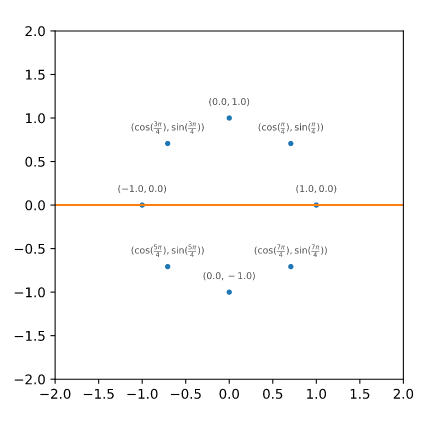

### Instructions
- Assign test_argument to a $8 x 2$ NumPy array holding the circular testing data shown in the plot, starting with (1.0, 0.0) and moving anticlockwise.
- Fill in with the slope and intercept of the straight line shown in the plot.
- Remembering that model_test() returns a float, complete the assert statement to check if model_test() returns the expected value of $r^2$ in this special case.

In [9]:
def test_on_circular_data(self):
    theta = pi/4.0
    # Assign to a NumPy array holding the circular testing data
    test_argument = np.array([[1.0, 0.0], [cos(theta), sin(theta)],
                              [0.0, 1.0],
                              [cos(3 * theta), sin(3 * theta)],
                              [-1.0, 0.0],
                              [cos(5 * theta), sin(5 * theta)],
                              [0.0, -1.0],
                              [cos(7 * theta), sin(7 * theta)]]
                             )
    # Fill in with the slope and intercept of the straight line
    actual = model_test(test_argument, slope=0.0, intercept=0.0)
    # Complete the assert statement
    assert actual == pytest.approx(0)

## Question
The tests test_on_perfect_fit() and test_on_circular_data() that you wrote in the last two exercises has been written to the test class TestModelTest in the test module models/test_train.py. Run the test class in the IPython console. What is the outcome?

In [10]:
!pytest utils/test_train_ch4.py

============================= test session starts ==============================
platform darwin -- Python 3.9.1, pytest-5.2.2, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.1.1
Freetype: 2.10.2
rootdir: /Users/alejandro.robles/PycharmProjects/unit-testing-for-data-science-in-python
plugins: mock-1.11.2, mpl-0.10
collected 7 items                                                              

utils/test_train_ch4.py .......                                          [100%]

============================== 7 passed in 0.46s ===============================


The sanity checks are all passing. model_test() seems to pass all the sanity checks. While this function is complicated and cannot be well tested, these sanity checks greatly reduce the chance of having a bug in it.

## Generate the baseline image
In this exercise, you will get one step closer to the real thing. During this whole course, you've built a library of tests using a Python script and an IPython console. In real life, you're more likely to use an IDE (Integrated Development Environment), that lets you write scripts in the language you want, organize them into your directories, and execute shell commands. Basically, an IDE increases your productivity by gathering the most common activities of software development into a single application: writing source code, executing, and debugging.

Here, you can see the directory you've built on the left pane. The upper right pane is where you will write your Python scripts, and the bottom right pane is a shell console, which replaces the IPython console you've used so far.

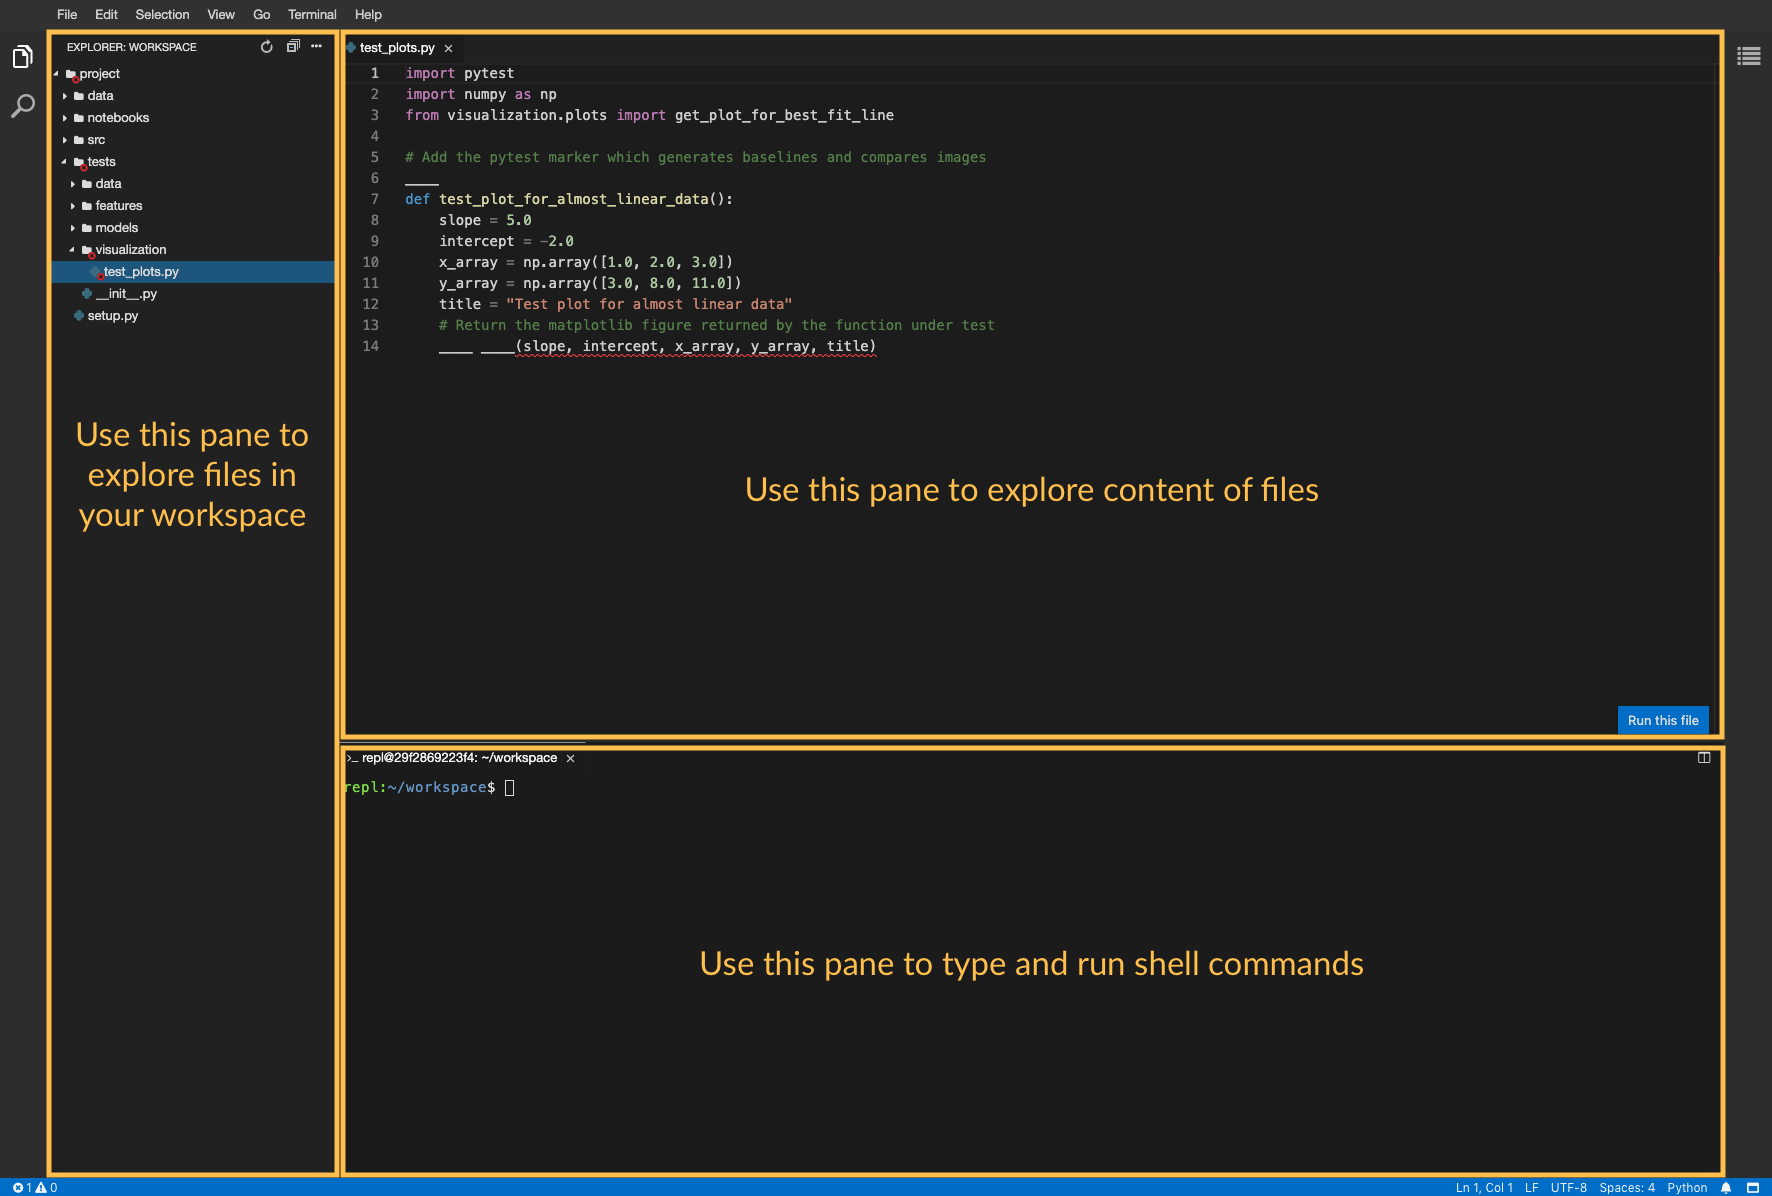

In this exercise, you will test the function introduced in the video get_plot_for_best_fit_line() on another set of test arguments. Here is the test data.

<code>
1.0    3.0
2.0    8.0
3.0    11.0
</code>
    
The best fit line that the test will draw follows the equation $y = 5x - 2$ . Two points, (1.0, 3.0) and (2.0, 8.0) will fall on the line. The point (3.0, 11.0) won't. The title of the plot will be "Test plot for almost linear data".

The test is called test_plot_for_almost_linear_data() and it's your job to complete the test and generate the baseline image. pytest, numpy as np and get_plot_for_best_fit_line has been imported for you.

### Instructions
- Add the correct pytest marker that helps in generating baselines and comparing images.
- Return the matplotlib figure returned by the function under test.
- The test that you wrote was written to a test class TestGetPlotForBestFitLine in the test module visualization/test_plots.py. In the shell console, execute the command required to create the baseline image for this test only. The baseline folder should be in project/tests/visualization. Because it's a shell console and not an IPython one, you don't need to use the ! at the beginning of your command. Once you've ran your command and created your baseline, click Submit Answer.

In [11]:
!pytest --mpl-generate-path utils/visualization/baseline -k "test_plot_for_almost_linear_data"



============================= test session starts ==============================
platform darwin -- Python 3.9.1, pytest-5.2.2, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.1.1
Freetype: 2.10.2
rootdir: /Users/alejandro.robles/PycharmProjects/unit-testing-for-data-science-in-python
plugins: mock-1.11.2, mpl-0.10
collected 44 items / 43 deselected / 1 selected                                

utils/test_plots.py s                                                    [100%]

=============================== warnings summary ===============================
/Users/alejandro.robles/PycharmProjects/unit-testing-for-data-science-in-python/venv/lib/python3.9/site-packages/_pytest/mark/structures.py:321
  /Users/alejandro.robles/PycharmProjects/unit-testing-for-data-science-in-python/venv/lib/python3.9/site-packages/_pytest/mark/structures.py:321: PytestUnknownMarkWarning: Unknown pytest.mark.mpl_image_compare - is this a typo?  You can register custom marks to avoid this warning - for details, see http

Great job completing the function and running the command required! After creating the baseline image, you should inspect it manually and verify if it looks as expected. Then you can then run the test against it, which you will do in the next exercise!

## Run the tests for the plotting function
Shortly after the baseline image was generated, one of your colleagues modified the plotting function. You have to run the tests in order to check whether the function still works as expected.

Remember the following:

The tests were housed in a test class TestGetPlotForBestFitLine in the test module visualization/test_plots.py. You can specify this test class in the pytest command by either using its node ID or the -k command line flag.
To ensure plots are compared to the baseline during testing, the pytest command must include a special command line flag that comes from the pytest-mpl package.

Run the tests in this test class in the console. Because it's a shell console and not an IPython one, you don't need to use the ! at the beginning of your command. You should see two failures.

In [12]:
!pytest -k "TestGetPlotForBestFitLine" --mpl

============================= test session starts ==============================
platform darwin -- Python 3.9.1, pytest-5.2.2, py-1.10.0, pluggy-0.13.1
Matplotlib: 3.1.1
Freetype: 2.10.2
rootdir: /Users/alejandro.robles/PycharmProjects/unit-testing-for-data-science-in-python
plugins: mock-1.11.2, mpl-0.10
collected 44 items / 43 deselected / 1 selected                                

utils/test_plots.py F                                                    [100%]

=================================== FAILURES ===================================
__________ TestGetPlotForBestFitLine.test_plot_for_almost_linear_data __________
Image file not found for comparison test in: 
	/Users/alejandro.robles/PycharmProjects/unit-testing-for-data-science-in-python/notebooks/utils/baseline
(This is expected for new tests.)
Generated Image: 
	/var/folders/vs/m7bhg1gj3pj8q7fphrq1k4x9g6hxf1/T/tmpiehb0imp/test_plot_for_almost_linear_data.png
=============================== warnings summary ================

## Fix the plotting function
In the last exercise, pytest saved the baseline images, actual images, and images containing the pixelwise difference in a temporary folder. The difference image for one of the tests test_on_almost_linear_data() is shown below.

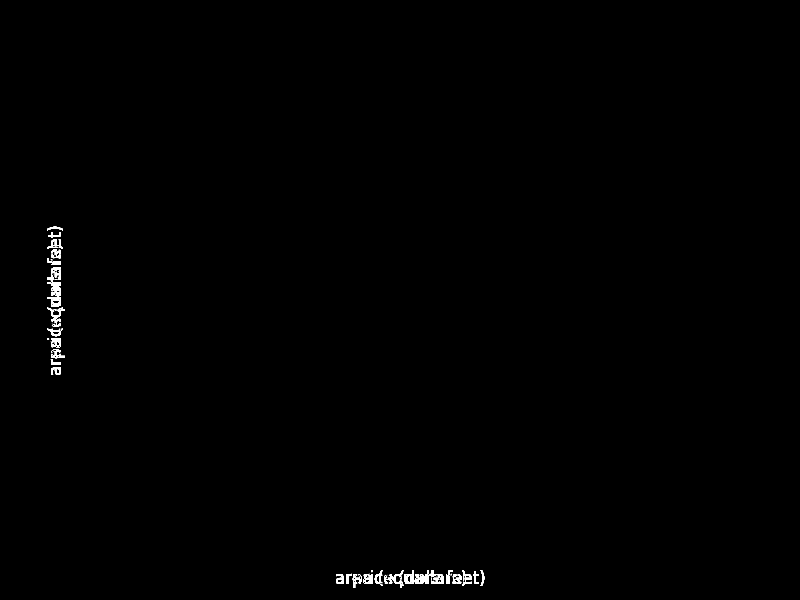

The black areas are where the actual image and the baseline matches. The white areas are where they don't match.

This clearly tells us that something is wrong with the axis labels. Take a look at the plots section to see the baseline (plot 1/2) and the actual plot (plot 2/2). Based on that, it's your job to fix the plotting function.

### Instructions

- Fill in the axis labels xlabel and ylabel so that they match the baseline plot (plot 1/2).

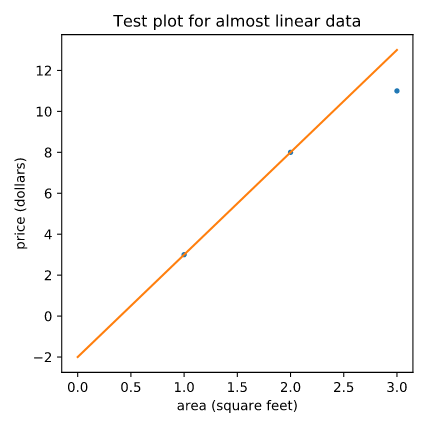

In [13]:
import matplotlib.pyplot as plt
import numpy as np

def get_plot_for_best_fit_line(slope, intercept, x_array, y_array, title):
    fig, ax = plt.subplots()
    ax.plot(x_array, y_array, ".")
    ax.plot([0, np.max(x_array)], [intercept, slope * np.max(x_array) + intercept], "-")
    # Fill in with axis labels so that they match the baseline
    ax.set(xlabel='area (square feet)', ylabel='price (dollars)', title=title)
    return fig